In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### importing dataset

In [2]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


#### Split data

In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#### Splitting dataset into training and test set

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### LDA-Linear Discriminant Analysis

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
x_train = lda.fit_transform(x_train,y_train)
x_test = lda.transform(x_test)

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

#### Confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


1.0

### Visualising Training Results

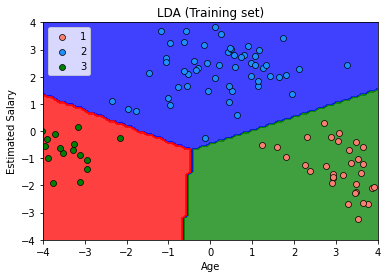

In [10]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=-4, stop=4.01, step=0.1),
                     np.arange(start=-4, stop=4.01, step=0.1))

Z = lr.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('green', 'blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('salmon', 'dodgerblue', 'green'))(i), label=j, edgecolors='black', linewidth=0.7)

plt.title('LDA (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Test Set

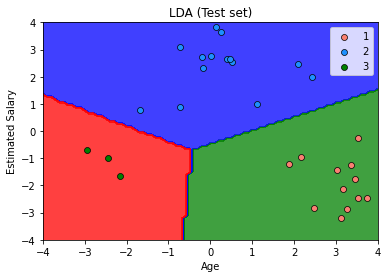

In [11]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=-4, stop=4.01, step=0.1),
                     np.arange(start=-4, stop=4.01, step=0.1))

Z = lr.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('green', 'blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('salmon', 'dodgerblue', 'green'))(i), label=j, edgecolors='black', linewidth=0.7)

plt.title('LDA (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()